# Jupyter Notebook per Abilità Informatiche
Progetto Covid-19, regione Puglia

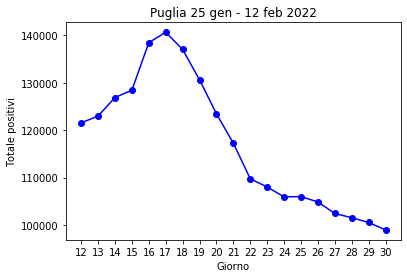

In [66]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy
from scipy.stats import poisson
from scipy.stats import gompertz
from scipy.optimize import curve_fit

x = []
y = []

#leggo i dati 
for line in open('daticovid.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y.append(int(lines[1]))
    
#plot totale dei positivi nel periodo considerato
plt.title("Puglia 25 gen - 12 feb 2022")
plt.xlabel('Giorno')
plt.ylabel('Totale positivi')
plt.plot(x, y, marker = 'o', c = 'b')
  
plt.show()

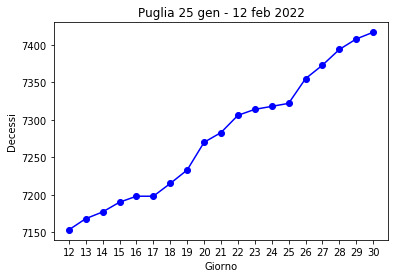

In [67]:
x=[]
y=[]

#leggo i dati 
for line in open('decessi.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y.append(int(lines[1]))
    
#plot totale dei positivi nel periodo considerato
plt.title("Puglia 25 gen - 12 feb 2022")
plt.xlabel('Giorno')
plt.ylabel('Decessi')
plt.plot(x, y, marker = 'o', c = 'b')
  
plt.show()

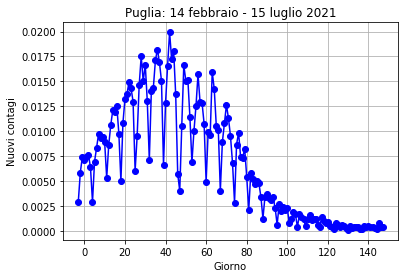

In [166]:
x=[]
y=[]


#leggo i dati 
for line in open('test.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(int(lines[1]))
    y.append(int(lines[0]))
    
yv=[None]*np.size(y)

somma=0
for i in range(0,151):
    yv[i]=y[i]/sum(y)
    x[i]=x[i]-360
    
#print(yv)
#print(y)


#plot dei nuovi positivi nel periodo considerato
plt.title("Puglia: 14 febbraio - 15 luglio 2021")
plt.xlabel('Giorno')
plt.ylabel('Nuovi contagi')
plt.plot(x, yv, marker = 'o', c = 'b')
plt.grid()
plt.show()

In [140]:
#definisco la funzione che calcola la log-likelihood negativa
def likelihood(t):
    l=0
    a=[None]*np.size(yv)
    #print(a)
    for i in range(0,np.size(a)):
        a[i]=math.log(math.factorial(y[i]))
    #print(a)
    l=-np.sum(a)+math.log(t)*np.sum(y)
    #print(l)
    return -(l-np.size(y)*t)

In [177]:
res = scipy.optimize.minimize_scalar(likelihood, method='bounded', bounds=(0,1000000000000000))
print(res)

     fun: 48393.90135907443
 message: 'Solution found.'
    nfev: 67
  status: 0
 success: True
       x: 787.0397325447448


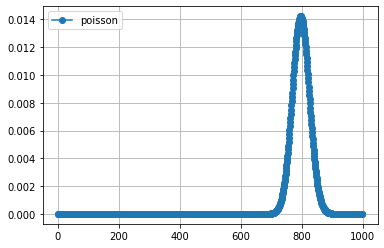

In [180]:
#plot poissoniana
x1 = np.arange(0, 1000, 1)
y1 = poisson.pmf(x1, mu=787.04, loc=10)

plt.plot(x1, y1,marker='o',label='poisson')
plt.grid()
plt.legend()
plt.show()

0.0066533082835676495 0.4112672769236304


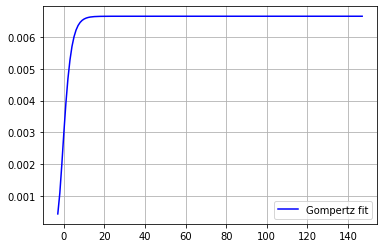

In [168]:
#funzione di Gompertz
def Gomp(x,K,r):
    c=np.log(0.003/K)
    g=K*np.exp(c*np.exp(-r*np.array(x)))
    return g
#fit
parameters, covariance = curve_fit(Gomp, x, yv)
print(parameters[0], parameters[1])
y_fit=Gomp(x,parameters[0],parameters[1])
plt.plot(x,y_fit, c='b', label='Gompertz fit')
plt.legend()
plt.grid()
plt.show()